# Lattice Thermal Conductivity (LTC)

- utprøving av minste kvadraters metode med data fra Periodic Table
- [oblig_3_periodic_table.ipynb](oblig_3_periodic_table.ipynb)

_14.11.2025 Sverre Stikbakke_

In [1]:
# fra read_csv.jl (med tillegg)

using CSV, DataFrames, PeriodicTable, Unitful, Statistics, Plots

df = CSV.read("LTC_with_atomic_numbers.csv", DataFrame)

# Convert string like "[72, 28, 50]" → Vector{Int}
df.atomic_numbers = [eval(Meta.parse(s)) for s in df.atomic_numbers];
first(df, 5)

Row,System,LTC,atomic_numbers
,String31,Float64,Array…
1,AlAuHf,2.962,"[13, 79, 72]"
2,AlGeLi,12.208,"[13, 32, 3]"
3,AlSiLi,2.367,"[13, 14, 3]"
4,AsNiSc,15.121,"[33, 28, 21]"
5,BaBiK,2.959,"[56, 83, 19]"


In [2]:
# Info om grunnstoffer 

names(PeriodicTable)

3-element Vector{Symbol}:
 :Element
 :PeriodicTable
 :elements

In [3]:
# Karbon (atomnummer 6)

elements[6]

category,polyatomic nonmetal
atomic mass,12.011 u
density,1.821 g/cm³
molar heat,8.517 J/mol⋅K
phase,Solid
shells,"[2, 4]"
electron configuration,1s² 2s² 2p²
summary,"Carbon (from Latin:carbo ""coal"") is a chemical element with symbol C and atomic number 6. On the periodic table, it is the first (row 2) of six elements in column (group) 14, which have in common the composition of their outer electron shell. It is nonmetallic and tetravalent—making four electrons available to form covalent chemical bonds."
discovered by,Ancient Egypt
source,https://en.wikipedia.org/wiki/Carbon


In [4]:
propertynames(elements[6])

(:name, :appearance, :atomic_mass, :boil, :category, :color, :cpk_hex, :density, :discovered_by, :el_config, :melt, :molar_heat, :named_by, :number, :period, :phase, :source, :spectral_img, :summary, :symbol, :xpos, :ypos, :shells)

In [5]:
# Hente ut en egenskap

#elements[6].atomic_mass
elements[1].boil

20.271 K

In [6]:
# Create a new 'atomic_mass' column by mapping a function 
# over the entire 'atomic_numbers' column

df.atomic_mass = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    masses = [ustrip(elements[el].atomic_mass) for el in atomic_nums]
    mean(masses)
end;

df.density = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    densities = [ustrip(elements[el].density) for el in atomic_nums]
    mean(densities)
end;

df.boil = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    boils = [ustrip(elements[el].boil) for el in atomic_nums]
    mean(boils)
end;

df.boil_max = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    boils = [ustrip(elements[el].boil) for el in atomic_nums]
    maximum(boils)
end;

df.melt = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    melts = [ustrip(elements[el].melt) for el in atomic_nums]
    mean(melts)
end;

df.melt_max = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    melts = [ustrip(elements[el].melt) for el in atomic_nums]
    maximum(melts)
end;

df.melt_min = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    melts = [ustrip(elements[el].melt) for el in atomic_nums]
    minimum(melts)
end;

df.atomic_num_max = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    masses = [el for el in atomic_nums]
    maximum(masses)
end;

df.atomic_num_min = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    masses = [el for el in atomic_nums]
    minimum(masses)
end;

df.atomic_num_avg = map(df.atomic_numbers) do atomic_nums
    # This inner part runs for each row
    masses = [el for el in atomic_nums]
    mean(masses)
end;

In [7]:
# Normalisere til verdi mellom 0 og 1
"""
col = df.atomic_mass
min_val = minimum(col)
max_val = maximum(col)
df.atomic_mass_norm = (col .- min_val) ./ (max_val - min_val);

col = df.LTC
min_val = minimum(col)
max_val = maximum(col)
df.LTC_norm = (col .- min_val) ./ (max_val - min_val);

col = df.density
min_val = minimum(col)
max_val = maximum(col)
df.density_norm = (col .- min_val) ./ (max_val - min_val);

col = df.boil
min_val = minimum(col)
max_val = maximum(col)
df.boil_norm = (col .- min_val) ./ (max_val - min_val);
""";

In [8]:
first(df, 5)

Row,System,LTC,atomic_numbers,atomic_mass,density,boil,boil_max,melt,melt_max,melt_min,atomic_num_max,atomic_num_min,atomic_num_avg
,String31,Float64,Array…,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Float64
1,AlAuHf,2.962,"[13, 79, 72]",134.145,11.77,3620.67,4876.0,1592.27,2506.0,933.47,79,13,54.6667
2,AlGeLi,12.208,"[13, 32, 3]",35.5172,2.85233,2484.0,3106.0,866.173,1211.4,453.65,32,3,16.0
3,AlSiLi,2.367,"[13, 14, 3]",20.6688,1.85433,2628.0,3538.0,1024.71,1687.0,453.65,14,3,10.0
4,AsNiSc,15.121,"[33, 28, 21]",59.5236,5.87333,NaN,NaN,NaN,NaN,NaN,33,21,27.3333
5,BaBiK,2.959,"[56, 83, 19]",128.469,4.71733,1662.33,2118.0,627.133,1000.0,336.7,83,19,52.6667


In [9]:
# Fjerner rader med NaN-verdier
for col in names(df)
    df[!, col] = replace(df[!, col], NaN => missing)
end
df = dropmissing(df);

In [10]:
A = Matrix(df[!, [:atomic_mass, :atomic_num_avg, :boil, :density, :melt]]);
b = Matrix(df[!, [:LTC]]);
display(A)
display(b)
x = A \ b

203×5 Matrix{Float64}:
 134.145   54.6667  3620.67   11.77     1592.27
  35.5172  16.0     2484.0     2.85233   866.173
  20.6688  10.0     2628.0     1.85433  1024.71
 128.469   52.6667  1662.33    4.71733   627.133
 104.21    44.0     2649.67    7.22433  1362.23
 118.86    50.0     2681.0     7.72     1357.23
 120.119   50.0     2727.33    8.26267  1395.58
  73.7743  33.3333  3564.33    7.796    1593.64
 148.585   60.6667  4167.33   14.6833   1878.1
 104.105   44.0     4147.67   10.8157   2239.13
 148.8     60.6667  3304.33   10.6633   1606.23
 119.726   50.0     3328.0     9.63567  1725.93
 193.228   77.3333  3705.33   15.2167   1923.23
   ⋮                                    
 142.142   58.0     1039.0     7.4764    421.4
 119.915   49.0      992.555   5.9266    374.3
  73.559   30.8     1047.42    4.77562   513.098
  65.351   27.6      636.218   3.79902   286.024
  58.0886  26.5     3155.25    6.9145   1526.98
  91.2572  39.3333  3337.0     8.38233  1897.93
  60.644   27.3333  372

203×1 Matrix{Float64}:
  2.962
 12.208
  2.367
  2.959
 10.849
  9.204
  6.891
 24.564
 24.391
 25.8
 20.412
 19.509
 10.844
  ⋮
  0.386
  0.758
  1.451
  1.757
 37.282
 14.537
 36.258
 13.379
 17.717
 16.788
 14.217
 19.181

5×1 Matrix{Float64}:
  1.40406717773646
 -3.2421308994880373
  0.0019499296035468338
 -5.315141099698021
  0.03274618650817724

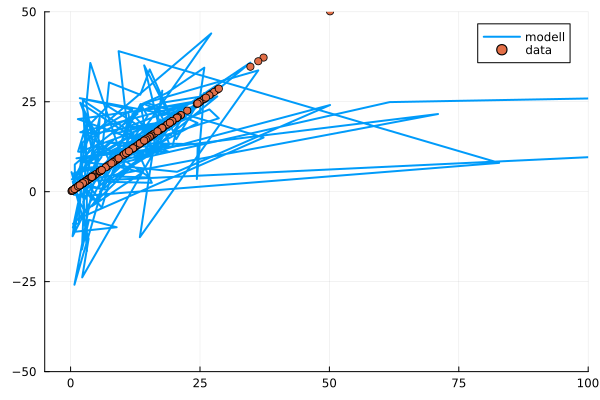

In [11]:
# --- Predict and plot --- Ikke helt heldig med denne (?)
pred = A * x
plot(df.LTC, pred, lw=2, label="modell", xlims=(-5,100), ylims=(-50,50))
scatter!(df.LTC, df.LTC, lw=2, label="data")

In [12]:
# Nytt forsøk - sorterer data etter LTC-kolonnen
df_ltc = sort(df, :LTC);
first(df_ltc, 5)

Row,System,LTC,atomic_numbers,atomic_mass,density,boil,boil_max,melt,melt_max,melt_min,atomic_num_max,atomic_num_min,atomic_num_avg
,String31,Float64,Array…,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Float64
1,CsRb3_mp-1183945,0.182,"[55, 37, 37, 37]",97.3272,1.6315,956.75,961.0,309.762,312.45,301.7,55,37,41.5
2,KRb3_mp-1185080,0.25,"[19, 37, 37, 37]",73.8754,1.3645,978.75,1032.0,318.512,336.7,312.45,37,19,32.5
3,TlBr_mp-22875,0.386,"[35, 81]",142.142,7.4764,1039.0,1746.0,421.4,577.0,265.8,81,35,58.0
4,K3Na_mp-1184844,0.41,"[19, 19, 19, 11]",35.0712,0.8885,1063.02,1156.09,345.261,370.944,336.7,19,11,17.0
5,AgBr_mp-866291,0.437,"[47, 35]",93.8861,6.7964,1383.5,2435.0,750.365,1234.93,265.8,47,35,41.0


In [13]:
A_ltc = Matrix(df[!, [:atomic_mass, :atomic_num_avg, :boil, :density, :melt]]);
b_ltc = Matrix(df[!, [:LTC]]);
x_ltc = A_ltc \ b_ltc;
pred_ltc = A_ltc * x_ltc;

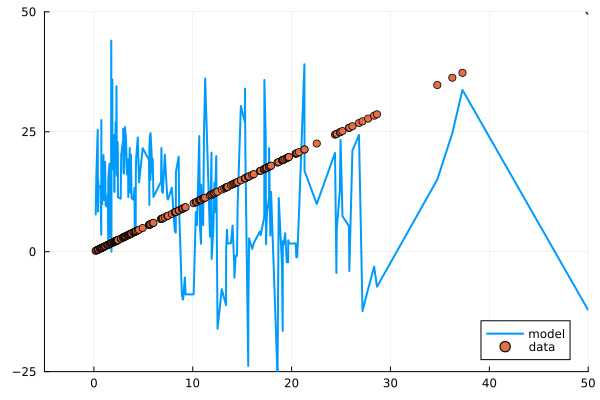

In [14]:
plot(df_ltc.LTC, pred_ltc, lw=2, label="model", xlims=(-5,50), ylims=(-25,50))
scatter!(df_ltc.LTC, df_ltc.LTC, lw=2, label="data")